# machine learning课程逻辑线性回归代码练习

# Part1
    In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
    Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

## 公式总结
#### Hypothesis function
$$ g(z) =  \frac{1}{1 + e^{-z} } $$
$$ h_{\theta} = g(\theta^{T}x) = \frac{1}{1 + e^{-\theta^{T}x} } $$
#### Cost function
$$ J(\theta ) = \frac{1}{m}\sum_{i=1}^{m}cost(h_{\theta} (x^{(i)}), y^{(i)}) $$

$$ cost(h_{\theta} (x^{(i)}), y^{(i)}) = \left \{ 
\begin{array}
-log(h_{\theta} (x^{(i)})) & y=1\\
-log(1 - h_{\theta} (x^{(i)}) & y=0
\end{array}
\right. $$
    可得:
$$ J(\theta ) = -\frac{1}{m}\sum_{i=1}^{m}\left [y^{(i)}log(h_{\theta} (x^{(i)})) + (1-y^{(i)})log(1 - h_{\theta} (x^{(i)})  \right ] $$
#### Gradient descent
$$ \theta_{j} = \theta_{j} - \frac{\partial J(\theta )}{\partial \theta_{j}} = \theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^{m}\left [(h_{\theta} (x^{(i)})-y^{(i)} ) x_{j}^{(i)}  \right ] $$

## 失误分析:
    1. 对本节课程理解不够深刻，忽略了决策边界部分教学内容，导致在验证训练出来的系统时候发现训练效果很差，肯定合格的分数计算出来合格可能性只有70左右。可能这跟sigmoid函数特性有关，在靠近边界时候训练效果较差。所以需要使用决策边界来判定，在np.dot(score, theta.T)大于0时候就可以判定y=1(合格)
       也就是说，如果经过sigmoid函数后，只要结果大于0.5都可以认为是合格
    
    2. 逻辑回归不进行特征缩放方便得到theta绘图查看，但训练次数大大增加，尝试过得30万次左右才能收敛。前面不收敛并不是因为梯度下降算法写的有问题，而是单纯的在没有特征缩放下训练次数不够。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 从文件中读取数据并保存
data_ex1 = np.loadtxt("ex2data1.txt", delimiter=",")

In [3]:
# 数据预处理
def data_preprocess(data):
    
    # 将点的信息存储在x,y中
    x = data[:, :data.shape[1]-1]
    y = data[:, data.shape[1]-1]
    
    # 在x数组中插入一列1的数组，提供偏置
    x = np.insert(x, 0, np.array([1]), 1)
    
    # 初始化theta，一定记得设置为浮点类型，否则无法收敛
    theta = np.array([0]*x.shape[1], dtype="f8")
    
    return x, y, theta

In [4]:
x, y, theta = data_preprocess(data_ex1)

### 先绘制数据图像，看一下图像大概样子

Text(0, 0.5, 'Class B score')

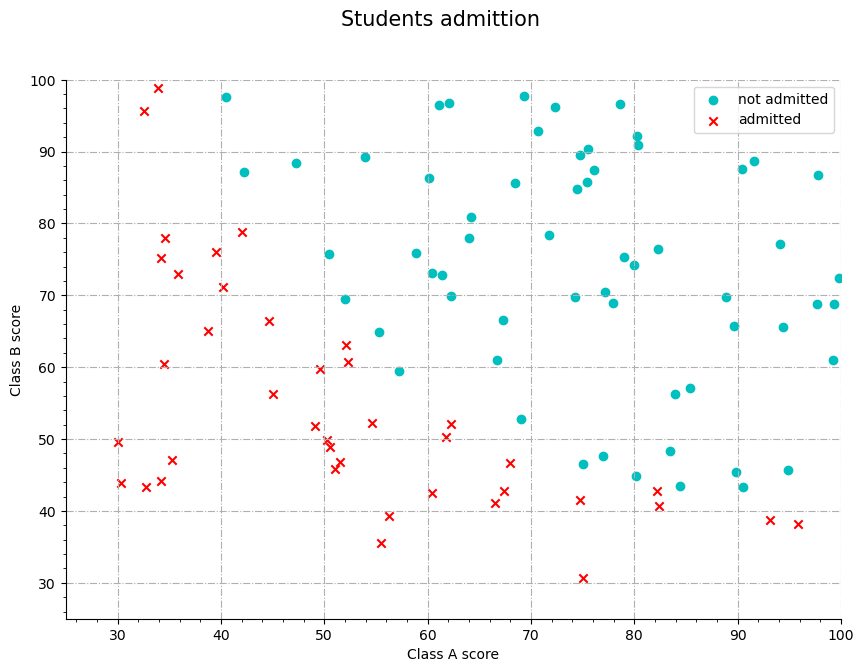

In [5]:
# 将不同的y值点区分开存储，方便绘图
positive_index = np.unique(np.where(y == 1)[0])    # 去除找到的坐标中重复的行下标
negative_index = np.unique(np.where(y == 0)[0])    # 去除找到的坐标中重复的行下标
positive_point = np.delete(x, negative_index, axis=0)    # 删除结果为-1的所有行
negative_point = np.delete(x, positive_index, axis=0)    # 删除结果为1的所有行

# 创建画布
fig, ax = plt.subplots(figsize=(10,7))

# 设置标题
fig.suptitle("Students admittion", fontsize=15)

# 绘制散点图
ax.scatter(positive_point[:, 1], positive_point[:, 2], color="c", marker="o", label="not admitted")
ax.scatter(negative_point[:, 1], negative_point[:, 2], color="r", marker="x", label="admitted")

# 显示label
ax.legend()

# 去除边框
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

# 设置网格
ax.grid(linestyle="-.")

#设置坐标轴显示范围和坐标轴上的小刻度
ax.set_xlim(25, 100)
ax.set_ylim(25, 100)
ax.minorticks_on()

# 设置坐标轴标题
ax.set_xlabel("Class A score")
ax.set_ylabel("Class B score")

In [6]:
# Sigmoid function
def sigmoid(z):
    return 1/(1+np.e**(-z))

# Cost function
def cost_func(x, y, theta):
    cost = -(1/len(y))*np.sum( (y*np.log(sigmoid(np.dot(x, theta)))) + ((1-y)*np.log(1-sigmoid(np.dot(x, theta)))) )
    return cost

# Gradient descent
def gradient_descent(x, y, theta, alpha):
    
    # 一定记得设置为浮点类型，否则无法收敛
    theta_new = np.array([0]*x.shape[1],dtype="f8")
    cost = cost_func(x, y, theta_new)

    # gradient descent, 同时赋值theta(j)
    for j in range(x.shape[1]):
        theta_new[j] = theta[j] - (alpha/len(y))*np.sum((sigmoid(np.dot(x, theta)) - y) * x[:, j])
        
    return cost, theta_new

In [7]:
# 对x进行特征缩放
def feature_scaling(x):
    
    x_scaled = np.ones(x.shape)
    for i in range(1, x.shape[1]):
        
        # 这里采用正规化，样本标准差(n-1)，少一个自由度
        x_scaled[:,i] = (x[:,i] - np.mean(x[:,i])) / np.std(x[:,i], ddof=1)

    return x_scaled

#x_scaled = feature_scaling(x)

x_scaled = x
# 没有进行特征缩放，代价是训练次数翻了很多倍，达到30万次才能收敛
# 但好处是得到的theta可以很直观的绘制图像，而且30万次训练时间在1min以内

In [8]:
# 设置times(迭代次数)，alpha(学习率)
alpha = 0.1
times = 1000000

In [9]:
# 定义一个0数组来接受迭代过程中返回的cost方便后面绘图使用
regcost = np.zeros([times], dtype="f8")
regtheta = np.zeros((times,3), dtype="f8")

# 进行times次迭代
for count in range(times):
    cost, theta = gradient_descent(x_scaled, y, theta, alpha)
    regtheta[count,:] = theta
    regcost[count] = cost

### 不用理会上面的警告信息，代码是正确的，可能是运行时间会比较长的警告

In [10]:
print("Training result")
print("Cost max: %.2f\tCost min: %.2f"%(np.max(regcost), np.min(regcost)))
print("Theta0: %.2f\tTheta1: %.2f\tTheta2: %.2f "%(theta[0], theta[1], theta[2]))

Training result
Cost max: 0.69	Cost min: 0.69
Theta0: -557.75	Theta1: 4.35	Theta2: 4.31 


### 尝试输入几个成绩进入系统验证结果
这里根据决策边界的判定，只要如下结果即可认为是合格的
$$ \theta^{T}x \ge 0 $$
可以从结果中看出1，2学生不能合格，第3个能够合格(基于训练参数预估结果)

In [11]:
# 先尝试3个成绩，数据随便定的
score = np.array([[80, 40], [60, 65], [40, 90]])

# 对数据进行处理
score = np.insert(score, 0, np.array([1]), 1)

qualified = list(sigmoid(np.dot(score, theta)))
print("Qualified?\t{:.1f}\t{:.1f}\t{:.1f}".format(qualified[0], qualified[1], qualified[2]))

Qualified?	0.0	0.0	1.0


In [12]:
score = np.array([1, 45, 82])
sigmoid(np.dot(score, theta))

0.00022543093998063558

In [13]:
# 用训练数据集查看系统的准确性
# 习题中没有给测试数据集，让直接用训练集测试
def accuracy(x, y, theta):
    
    # 通过训练出的系统分辨每个学生是否合格
    qualified = (np.dot(x, theta) >= 0)
    
    # 统计 正确分类/总人数
    return np.sum((qualified == y) == True) / len(y)

print("Accuracy: {:.2%}".format(accuracy(x, y, theta)))

Accuracy: 87.00%


### 再次绘制图像查看训练出的函数效果

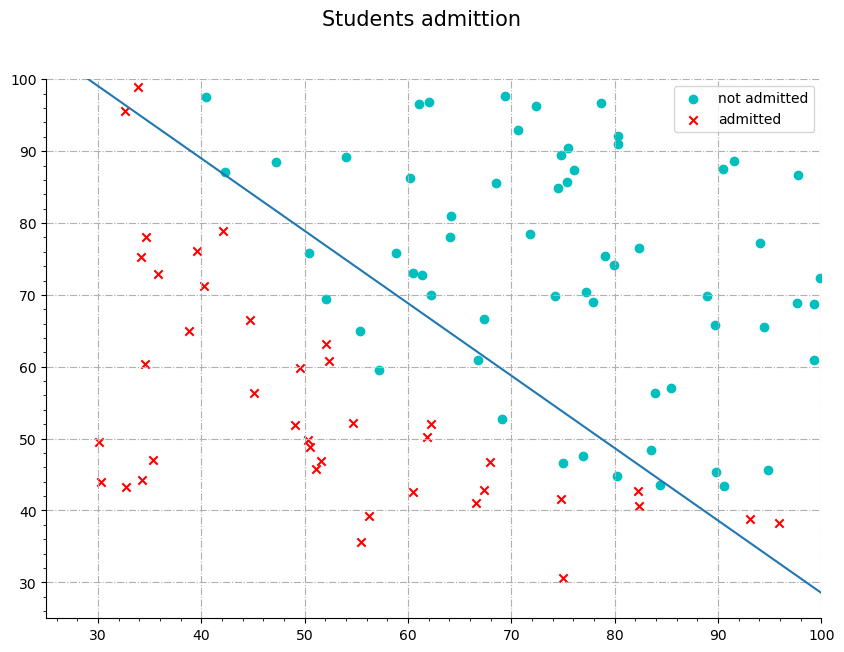

In [14]:
# 创建画布
fig2, ax2 = plt.subplots(figsize=(10,7))

# 设置标题
fig2.suptitle("Students admittion", fontsize=15)

# 绘制散点图
ax2.scatter(positive_point[:, 1], positive_point[:, 2], color="c", marker="o", label="not admitted")
ax2.scatter(negative_point[:, 1], negative_point[:, 2], color="r", marker="x", label="admitted")

# 显示label
ax2.legend()

# 去除边框
ax2.spines["top"].set_color("None")
ax2.spines["right"].set_color("None")

# 设置网格
ax2.grid(linestyle="-.")

#设置坐标轴显示范围和坐标轴上的小刻度
ax2.set_xlim(25, 100)
ax2.set_ylim(25, 100)
ax2.minorticks_on()

# 设置坐标轴标题
ax.set_xlabel("Class A score")
ax.set_ylabel("Class B score")

x1_var = np.linspace(25, 100, 200)
x2_var = -(theta[1]/theta[2])*x1_var - (theta[0]/theta[2])

ax2.plot(x1_var, x2_var)

# Part2 Regularized logistic regression
    In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

## 公式总结 Regularization
#### Hypothesis function
$$ g(z) =  \frac{1}{1 + e^{-z} } $$
$$ h_{\theta} = g(\theta^{T}x) = \frac{1}{1 + e^{-\theta^{T}x} } $$
#### Cost function
$$ J(\theta ) = -\frac{1}{m}\sum_{i=1}^{m}\left [y^{(i)}log(h_{\theta} (x^{(i)})) + (1-y^{(i)})log(1 - h_{\theta} (x^{(i)})  \right ] + \frac{\lambda }{2m}\sum_{j=1}^{n} \theta _{j}^{2}  $$
#### Gradient descent
$$ \theta_{j} = (1-\alpha\frac{\lambda }{m})\theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^{m}\left [(h_{\theta} (x^{(i)})-y^{(i)} ) x_{j}^{(i)}  \right ] $$

In [15]:
# 从文件中读取数据并保存
data_ex2 = np.loadtxt("ex2data2.txt", delimiter=",")

# 数据预处理
x, y, theta = data_preprocess(data_ex2)

# 重新定义theta，有28个参数，x去除第一列的1的偏置元素
theta = np.array([0]*28, dtype="f8")
x = x[:,1:3]

### 绘制出点的图像看一下分布情况

Text(0, 0.5, 'Test2')

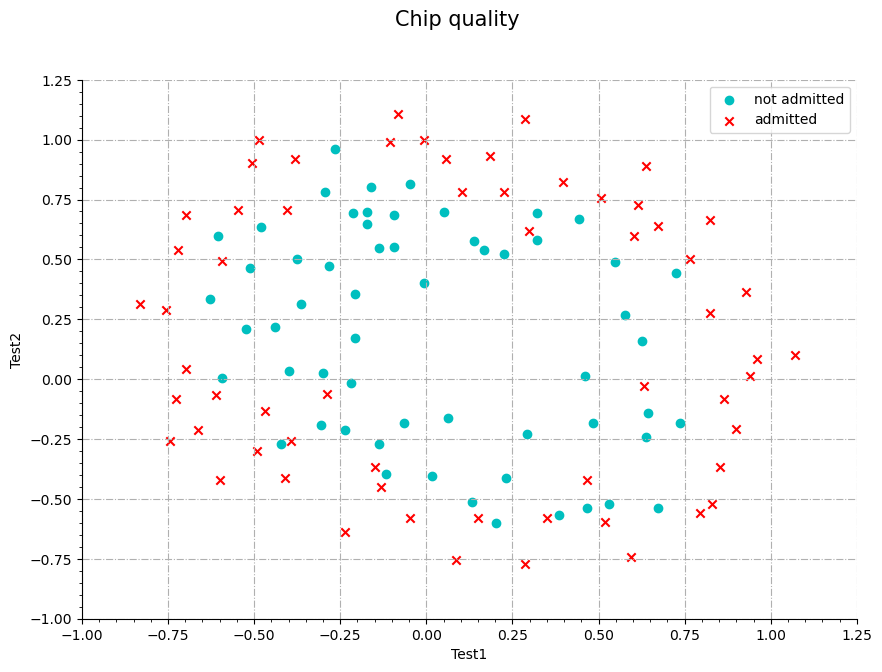

In [16]:
# 将不同的y值点区分开存储，方便绘图
positive_index = np.unique(np.where(y == 1)[0])    # 去除找到的坐标中重复的行下标
negative_index = np.unique(np.where(y == 0)[0])    # 去除找到的坐标中重复的行下标
positive_point = np.delete(x, negative_index, axis=0)    # 删除结果为-1的所有行
negative_point = np.delete(x, positive_index, axis=0)    # 删除结果为1的所有行

# 创建画布
fig, ax = plt.subplots(figsize=(10,7))

# 设置标题
fig.suptitle("Chip quality", fontsize=15)

# 绘制散点图
ax.scatter(positive_point[:, 0], positive_point[:, 1], color="c", marker="o", label="not admitted")
ax.scatter(negative_point[:, 0], negative_point[:, 1], color="r", marker="x", label="admitted")

# 显示label
ax.legend()

# 去除边框
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

# 设置网格
ax.grid(linestyle="-.")

#设置坐标轴显示范围和坐标轴上的小刻度
ax.set_xlim(-1, 1.25)
ax.set_ylim(-1, 1.25)
ax.minorticks_on()

# 设置坐标轴标题
ax.set_xlabel("Test1")
ax.set_ylabel("Test2")

### 先根据题目需要写出hypothesis function的参数
    这里参数涉及dim=6, 特征有28个较多，所以容易过拟合，需要正则化
    下面是作业中提供的参数源代码，用的octave，翻译成Python语言的大概意思放在右边，不能运行，其中x只是函数符号。
    degree = 6;
    out = ones(size(X1(:,1)));
    for i = 1:degree                                         for i in range(0,7):
        for j = 0:i                                               for j in range(0,i+1):
            out(:, end+1) = (X1.^(i-j)).*(X2.^j);                      x1^(i-j) * x2^j
        end
    end

In [17]:
def feature(x):
    
    # 将reg定义为1的2维数组，准备接收后面的值 
    reg = np.ones((x.shape[0], 1), dtype="f8")
    count = 1    # 计数器

    # 在reg中已经有1的元素，相当于偏置已经有了，可以从i=1开始遍历
    for i in range(1, 7):
        for j in range(0, i+1):
            reg = np.insert(reg, obj=count, values=(x[:, 0]**(i-j)) * (x[:, 1]**j), axis=1)
            count += 1    
    
    return reg

In [18]:
# 将根据要求计算好的参数值赋给x
x = feature(x)

# 检查输出的参数形状是否正确，28个特征应该有28列
x.shape

(118, 28)

### 重新定义Regularization下的函数

In [19]:
# 初始化theta，所有值赋上0
theta = np.array([0]*28, dtype="f8")

In [20]:
# Gradient descent, "lam" means lambda
def gradient_descent_regular(x, y, theta, alpha, lam):
    
    # 一定记得设置为浮点类型，否则无法收敛
    theta_new = np.array([0]*x.shape[1],dtype="f8")
    
    # 未做正则化训练1次的参数
    cost_nonregular, theta_nonregular = gradient_descent(x, y, theta, alpha)

    # 加上正则化项
    cost_regularized = cost_nonregular + lam/(2*len(y)) * np.sum(theta**2)
    for j in range(x.shape[1]):
        theta_new[j] = theta_nonregular[j] - alpha*(lam/len(y))*theta[j]
        
    return cost, theta_new

In [21]:
# 设置times(迭代次数)，alpha(学习率)，lam(lambda)
alpha = 0.01
times = 100000
lam = 0.001

In [22]:
# 定义一个0数组来接受迭代过程中返回的cost方便后面绘图使用
regcost = np.zeros([times], dtype="f8")
regtheta = np.zeros((times,28), dtype="f8")

# 进行times次迭代
for count in range(times):
    cost, theta = gradient_descent_regular(x, y, theta, alpha, lam)
    regtheta[count,:] = theta
    regcost[count] = cost

In [23]:
regtheta

array([[-8.47457627e-05, -1.87880932e-04, -7.77711864e-07, ...,
        -7.26504316e-05, -1.37646175e-05, -3.87936363e-04],
       [-1.67931579e-04, -3.75340323e-04, -9.04203917e-07, ...,
        -1.45234612e-04, -2.75275813e-05, -7.75381018e-04],
       [-2.49563551e-04, -5.62378924e-04, -3.81648770e-07, ...,
        -2.17752742e-04, -4.12888655e-05, -1.16233536e-03],
       ...,
       [ 3.24335728e+00,  2.29857803e+00,  3.55818410e+00, ...,
        -1.30261690e+00, -1.13788145e+00, -1.67774090e+00],
       [ 3.24336457e+00,  2.29858311e+00,  3.55819235e+00, ...,
        -1.30262316e+00, -1.13788927e+00, -1.67773518e+00],
       [ 3.24337187e+00,  2.29858818e+00,  3.55820059e+00, ...,
        -1.30262943e+00, -1.13789710e+00, -1.67772946e+00]])

In [24]:
regcost

array([0.69314718, 0.69314718, 0.69314718, ..., 0.69314718, 0.69314718,
       0.69314718])